In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, Point
import pyproj
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


bsas_map = gpd.read_file('../gopa_data/barrios-ciudad')
coordinates = pd.read_csv('../raw_data/coordinates_data.csv')

In [10]:
bsas_map.head(5)

,BARRIO,COMUNA,GEOJSON,geometry
0,CHACARITA,15.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.45282 -34.59599, -58.45366 -34.5..."
1,PATERNAL,15.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.46558 -34.59656, -58.46562 -34.5..."
2,VILLA CRESPO,15.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.42375 -34.59783, -58.42495 -34.5..."
3,VILLA DEL PARQUE,11.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.49461 -34.61487, -58.49479 -34.6..."
4,ALMAGRO,5.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."


In [3]:
coordinates.drop(columns='geometry', inplace=True)
gpd_data = gpd.GeoDataFrame(coordinates,
                         geometry = gpd.points_from_xy(coordinates.search_longitude, coordinates.search_latitude))
gpd_data

,search_longitude,search_latitude,arrive,leave,search_method,timestamp,uid,x,y,new_x,new_y,arrive_date,dayOfWeek,geometry
0,-58.440447,-34.620694,2021-02-28 15:56:00+00:00,2021-02-28 17:32:00+00:00,google,2021-01-31T19:35:42.438-03:00,NaN,-58.440447,-34.620694,0.097696,0.084863,2021-02-28,6,POINT (-58.44045 -34.62069)
1,-58.418288,-34.581668,2021-02-13 15:12:45.668000+00:00,2021-02-13 16:12:45.668000+00:00,searchInThisArea,2021-02-13T12:13:03.714-03:00,e8itgepSU1YX6Q48HtrDpz76OXr1,-58.418288,-34.581668,0.119855,0.123889,2021-02-13,5,POINT (-58.41829 -34.58167)
2,-58.208933,-34.831096,2021-01-25 17:45:27.320000+00:00,2021-01-25 18:45:27.320000+00:00,searchInThisArea,2021-01-25T14:45:44.753-03:00,NaN,-58.208933,-34.831096,0.329210,-0.125539,2021-01-25,0,POINT (-58.20893 -34.83110)
3,-58.454943,-34.564354,2021-02-25 11:20:09.755000+00:00,2021-02-25 12:20:09.755000+00:00,searchInThisArea,2021-02-25T08:22:32.254-03:00,NaN,-58.454943,-34.564354,0.083200,0.141203,2021-02-25,3,POINT (-58.45494 -34.56435)
4,-58.451924,-34.559296,2020-09-17 10:45:00+00:00,2020-09-17 11:00:00+00:00,update_time_home,2020-09-17T08:13:03.302GMT-03:00,unauthenticated,-58.451924,-34.559296,0.086219,0.146261,2020-09-17,3,POINT (-58.45192 -34.55930)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7401,-58.536259,-34.624580,2020-12-21 08:00:54.782000+00:00,2020-12-21 14:00:00+00:00,update_time_home,2020-12-21T10:57:42.699GMT-03:00,unauthenticated,-58.536259,-34.624580,0.001884,0.080977,2020-12-21,0,POINT (-58.53626 -34.62458)
7402,-58.539242,-34.812266,2021-02-17 01:49:07.945000+00:00,2021-02-17 02:49:07.945000+00:00,google,2021-02-16T22:49:24.602-03:00,NaN,-58.539242,-34.812266,-0.001099,-0.106709,2021-02-17,2,POINT (-58.53924 -34.81227)
7403,-58.512720,-34.469415,2020-11-17 09:00:00+00:00,2020-11-17 09:15:00+00:00,google,2020-11-17T09:32:01.879GMT-03:00,BLLbW2aUT4Xd5Kyu4lUX98MMget1,-58.512720,-34.469415,0.025423,0.236142,2020-11-17,1,POINT (-58.51272 -34.46942)
7404,-58.383415,-34.591915,2021-01-23 04:15:18.431000+00:00,2021-01-23 05:15:18.431000+00:00,this_area,2021-01-23T07:12:43.879GMT-03:00,unauthenticated,-58.383415,-34.591915,0.154728,0.113642,2021-01-23,5,POINT (-58.38341 -34.59192)


In [4]:
reservas_bsas = gpd_data[['geometry']]

reservas_bsas.head(3)


,geometry
0,POINT (-58.44045 -34.62069)
1,POINT (-58.41829 -34.58167)
2,POINT (-58.20893 -34.83110)


In [5]:
reservas_bsas = reservas_bsas.set_crs("EPSG:4326")
reservas_bsas.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
barrio = 'CIUDAD'

if barrio == 'CIUDAD':
        df_barrio = bsas_map
else:
    df_barrio = bsas_map[bsas_map['BARRIO'] == barrio]
if df_barrio.empty == True:
    print('Please enter another nighborhood')

In [ ]:
df_barrio.head(3)

In [ ]:
reservas_barrio = reservas_bsas.within(df_barrio)
reservas_barrio

In [ ]:
cond_reservas_barrio = gpd_data.apply(lambda x: df_barrio.contains(x.geometry), axis=1)
cond_reservas_barrio

In [ ]:
gpd_data['reservas_barrio'] = cond_reservas_barrio
gpd_data

In [ ]:
gpd_data = gpd_data[gpd_data.reservas_barrio == True]
gpd_data

In [ ]:
df_barrio.crs

(-34.7, -34.525)

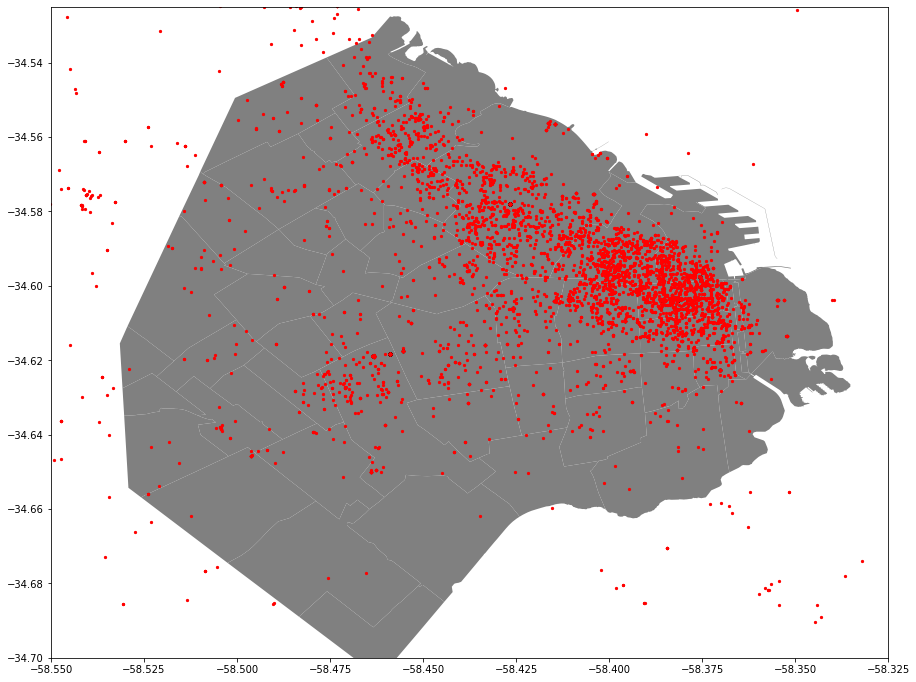

In [7]:
fig,ax = plt.subplots(figsize = (15,16))
df_barrio.plot(ax=ax, color='grey')
gpd_data.plot(ax=ax, markersize=5, color='red')
ax.set_xlim([-58.550, -58.325])
ax.set_ylim([-34.700, -34.525])